In [1]:
import seaborn as sns
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

import numpy as np
import glob

In [2]:
sns.set_style("whitegrid")
matplotlib.rcParams.update({'font.size': 20})

In [3]:
d = []

for pth in glob.glob('./results/modular/*'):
    df = pd.read_csv(pth)
    latent_states = set(df['latent_state'])
    if 5 not in latent_states and 2 not in latent_states:
        d.append(pth)

print(len(d))
print(d)

0
[]


In [4]:
color_map = plt.cm.get_cmap('Set2')
hex_values = [color_map(i)[:3] for i in range(color_map.N)]
hex_colors = [mcolors.rgb2hex(color) for color in hex_values]
print(hex_colors)

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


/tmp/ipykernel_123005/701946055.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('Set2')


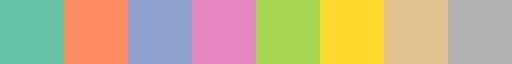

In [5]:
color_map

In [6]:
def plot_phases(df, alpha, s, n_states):
    plt.figure(figsize=(10, 5))

    # sns.scatterplot(data=df, x='step', y='train_loss', hue='latent_state', palette="pastel", s=40, alpha=1)
    # code below replication of the above function, with more control
    for i in range(n_states):
        mask = df['latent_state'] == i
        plt.scatter(df[mask]['step'], df[mask]['train_loss'], color=color_map(i), s=s, alpha=1)
    sns.lineplot(data=df, x='step', y='train_loss', linewidth=2, color='black', alpha=alpha, linestyle='--', label='Train')
    # plt.plot(df['step'], df['train_loss'], linewidth=2, color='black', alpha=alpha, linestyle='--', dashes=(10, 10), label='Train')

    # test
    for i in range(n_states):
        mask = df['latent_state'] == i
        plt.scatter(df[mask]['step'], df[mask]['eval_loss'], color=color_map(i), s=s)
    sns.lineplot(data=df, x='step', y='eval_loss', linewidth=2, color='black', alpha=alpha, label='Validation')

    plt.xlabel('Step')
    plt.ylabel('Loss')
    
# step --> epoch
def plot_phases_multiberts(df, alpha, s, n_states):
    fig, ax1 = plt.subplots(figsize=(8, 5))

    for i in range(n_states):
        mask = df['latent_state'] == i
        ax1.scatter(df[mask]['epoch'], df[mask]['train_loss'], color=color_map(i), s=s, alpha=1)
        
    sns.lineplot(ax=ax1, data=df, x='epoch', y='train_loss', linewidth=2, color='black', alpha=alpha, linestyle=':', label='Pretraining loss')
    
    ax2 = ax1.twinx()
    
    for i in range(n_states):
        mask = df['latent_state'] == i
        ax2.scatter(df[mask]['epoch'], df[mask]['mean_w'], color=color_map(i), s=s, alpha=1)

    sns.lineplot(ax=ax2, data=df, x='epoch', y='mean_w', linewidth=2, color='black', alpha=alpha, linestyle='-', label='Average weight')

    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    # Combine the handles and labels
    handles = handles1 + handles2
    labels = labels1 + labels2
    
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Average weight')
    # Create a shared legend for both y-axes
    ax1.legend().remove()
    ax2.legend().remove()
    
    ax2.ticklabel_format(axis='y', style='sci', scilimits=(-5,-5))
    # ax2.yaxis.get_offset_text().set_text('e-4')
    
#     formatter = ticker.ScalarFormatter(useMathText=True)
#     formatter.set_powerlimits((0, 0))
#     formatter.set_scientific(True)
#     # formatter.set_precision(5)
#     ax2.yaxis.set_major_formatter(formatter)
    # ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    # plt.ticklabel_format(style='plain', axis='y', useOffset=False)
    ax1.legend(handles, labels)
    
    return fig, (ax1, ax2)

    

# conceptual figure

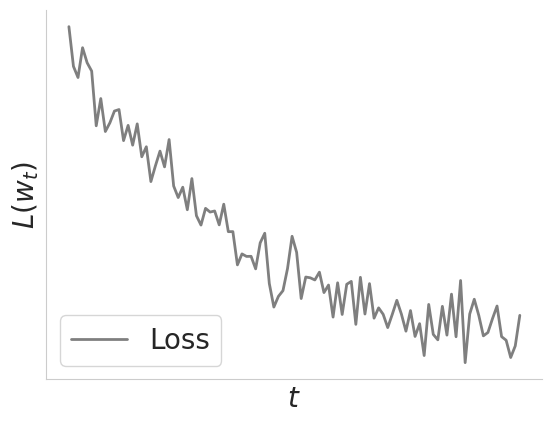

In [7]:
def exponential_function(x, a, b):
    return a * np.exp(-b * x)

# Generate x values
x = np.linspace(0, 5, 100)

# Set the parameters for the exponential decay function
a = 2  # Initial value
b = 0.5  # Decay rate

# Calculate y values using the exponential decay function
y = exponential_function(x, a, b)
noise = np.random.normal(0, 0.1, len(x))
y_with_noise = y + noise


# Plot the exponential decay function
plt.plot(x, y_with_noise, label='Loss', linewidth=2, color='black', alpha=0.5)
plt.xlabel('$t$')
plt.ylabel('$L(w_t)$')
# plt.title('Exponential Decay Function: y = {} * exp(-{} * x)'.format(a, b))
plt.legend(loc='lower left')
# plt.grid(True)
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.savefig("./figures/conceptual_before")

Text(0, 0.5, '$L(w_t)$')

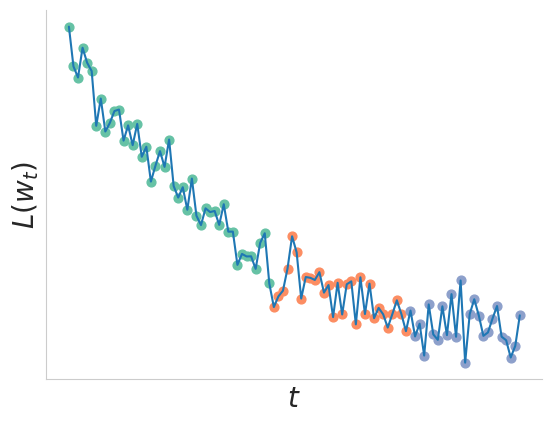

In [8]:
colors = [0]*45 + [1]*30 + [2]* 25
colors = np.array(colors)


for i in range(3):
    mask = colors == i
    plt.scatter(x[mask], y_with_noise[mask], color=color_map(i), s=40, alpha=1)
plt.plot(x, y_with_noise)
    
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$t$')
plt.ylabel('$L(w_t)$')
# plt.savefig("./figures/conceptual_after")

In [9]:
colors

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# OWN WORK

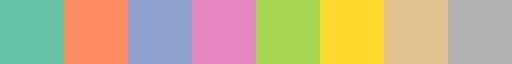

In [10]:
color_map

/home/ubuntu/miniconda3/envs/emthanhcv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/miniconda3/envs/emthanhcv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/miniconda3/envs/emthanhcv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/miniconda3/envs/emthanhcv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

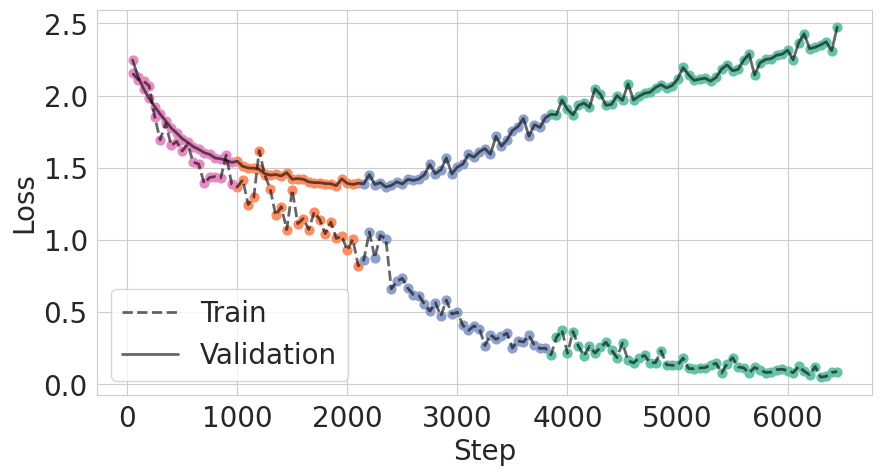

In [43]:
import os
run=30
component=4
lr = '1e-3'
config = 'resnet18_0.1imb_weighted'
full_path_folder = f'../img_lr{lr}/hmm_curves_run/{config}/{component}components'

df = pd.read_csv(f'../results_{lr}/hmm_pred/{config}/{component}components/{component}_run{run}.csv')
plot_phases(df, 0.6, 40, n_states=component)
if not os.path.isdir(full_path_folder):
    os.makedirs(full_path_folder)
plt.savefig(f'../img_lr{lr}/hmm_curves_run/{config}/{component}components/{component}_run{run}.png', dpi=300, bbox_inches='tight')

/home/ubuntu/miniconda3/envs/emthanhcv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/miniconda3/envs/emthanhcv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/miniconda3/envs/emthanhcv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/miniconda3/envs/emthanhcv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

NameError: name 'full_path_folder' is not defined

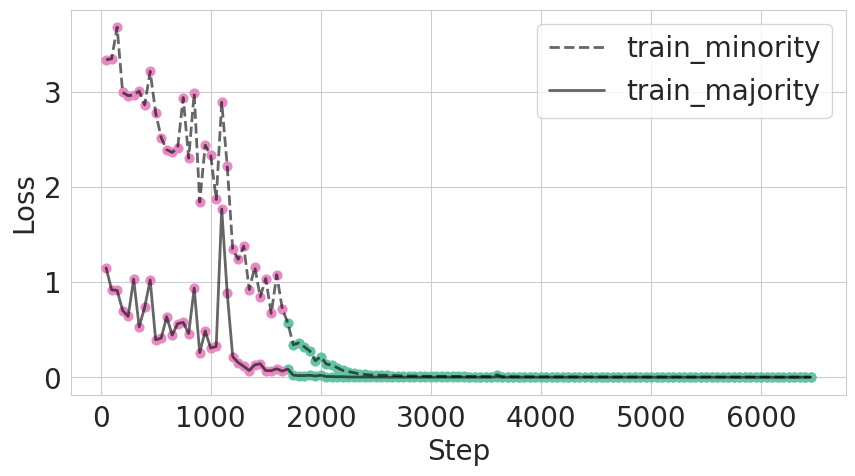

In [12]:
import os
def plot_phases_minor_major(df, alpha, s, n_states):
    plt.figure(figsize=(10, 5))

    # sns.scatterplot(data=df, x='step', y='train_loss', hue='latent_state', palette="pastel", s=40, alpha=1)
    # code below replication of the above function, with more control
    for i in range(n_states):
        mask = df['latent_state'] == i
        plt.scatter(df[mask]['step'], df[mask]['train_minority_loss'], color=color_map(i), s=s, alpha=1)
    sns.lineplot(data=df, x='step', y='train_minority_loss', linewidth=2, color='black', alpha=alpha, linestyle='--', label='train_minority')
    # plt.plot(df['step'], df['train_loss'], linewidth=2, color='black', alpha=alpha, linestyle='--', dashes=(10, 10), label='Train')

    # test
    for i in range(n_states):
        mask = df['latent_state'] == i
        plt.scatter(df[mask]['step'], df[mask]['train_majority_loss'], color=color_map(i), s=s)
    sns.lineplot(data=df, x='step', y='train_majority_loss', linewidth=2, color='black', alpha=alpha, label='train_majority')

    plt.xlabel('Step')
    plt.ylabel('Loss')
    
# step --> epoch
def plot_phases_multiberts(df, alpha, s, n_states):
    fig, ax1 = plt.subplots(figsize=(8, 5))

    for i in range(n_states):
        mask = df['latent_state'] == i
        ax1.scatter(df[mask]['epoch'], df[mask]['train_loss'], color=color_map(i), s=s, alpha=1)
        
    sns.lineplot(ax=ax1, data=df, x='epoch', y='train_loss', linewidth=2, color='black', alpha=alpha, linestyle=':', label='Pretraining loss')
    
    ax2 = ax1.twinx()
    
    for i in range(n_states):
        mask = df['latent_state'] == i
        ax2.scatter(df[mask]['epoch'], df[mask]['mean_w'], color=color_map(i), s=s, alpha=1)

    sns.lineplot(ax=ax2, data=df, x='epoch', y='mean_w', linewidth=2, color='black', alpha=alpha, linestyle='-', label='Average weight')

    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    # Combine the handles and labels
    handles = handles1 + handles2
    labels = labels1 + labels2
    
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Average weight')
    # Create a shared legend for both y-axes
    ax1.legend().remove()
    ax2.legend().remove()
    
    ax2.ticklabel_format(axis='y', style='sci', scilimits=(-5,-5))
    # ax2.yaxis.get_offset_text().set_text('e-4')
    
#     formatter = ticker.ScalarFormatter(useMathText=True)
#     formatter.set_powerlimits((0, 0))
#     formatter.set_scientific(True)
#     # formatter.set_precision(5)
#     ax2.yaxis.set_major_formatter(formatter)
    # ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    # plt.ticklabel_format(style='plain', axis='y', useOffset=False)
    ax1.legend(handles, labels)
    
    return fig, (ax1, ax2)

    
run=0
component=4
lr = '1e-3'
config = 'resnet18_0.1imb'
# full_path_folder = f'../img_lr{lr}/hmm_curves_run/{config}/{component}components'

df = pd.read_csv(f'../test/hmm_pred/{config}/{component}components/{component}_run{run}.csv')
plot_phases(df, 0.6, 40, n_states=component)
# if not os.path.isdir(full_path_folder):
#     os.makedirs(full_path_folder)
# plt.savefig(f'../img_lr{lr}/hmm_curves_run/{config}/{component}components/{component}_run{run}.png', dpi=300, bbox_inches='tight')